#  PDA_Projcet_2 

In [53]:
# Important library 

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os

### 1. The EPICA deep ice cores 

This research article delves into the European Project for Ice Coring in Antarctica (EPICA), focusing on two pivotal deep ice cores drilled in Dome C and Dronning Maud Land (DML). With the primary goal of understanding climatic variations in the Southern Hemisphere, the Dome C core offers insights into global climate mechanisms over extensive cycles, while the DML core provides a detailed record for comparative analysis with Greenland records. Published in the Annals of Glaciology in 2004, this study contributes to the broader understanding of climate dynamics on the Antarctic continent[1].

[1]. https://www.cambridge.org/core/journals/annals-of-glaciology/article/epica-deep-ice-cores-first-results-and-perspectives/BFC6D11388E8723E5B6BE0978A39201B#

In [45]:
# Read the text file into a DataFrame
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()

df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()

df=df.drop(['Bag','ztop','Deuterium'],axis=1)

df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5785 entries, 12 to 5799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5785 non-null   float64
 1   Temperature  5785 non-null   float64
dtypes: float64(2)
memory usage: 135.6 KB


In [46]:
# Checking for null entries in each column
null_counts = df.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
Age            0
Temperature    0
dtype: int64


In [27]:
df.head(10)

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42
17,81.93244,0.05
18,90.75925,0.05
19,99.97031,-0.52
20,109.88879,0.79
21,119.25888,-0.55


#### Histogram for Temperature and Age 



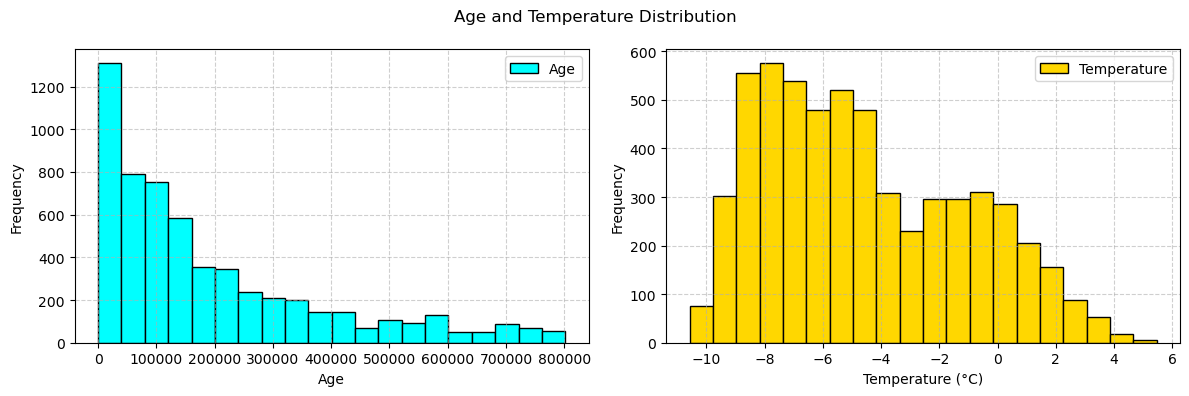

In [62]:
# Histogram for temperature data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Age histogram
axs[0].hist(df['Age'], label="Age", bins=20, color='aqua', edgecolor='black')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
# Add legend 
axs[0].legend()
# Add grid
axs[0].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Temperature histogram
axs[1].hist(df['Temperature'], label="Temperature", bins=20, color= 'gold', edgecolor='black')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Frequency')
# Add legend 
axs[1].legend()
# Add grid
axs[1].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Addig title
plt.suptitle("Age and Temperature Distribution")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [17]:
df.describe()


,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


In [29]:
# folder location
input_folder = r'C:\Users\PC\DA\PDA_Project_2\data'

# files names
filename01='41586_2008_BFnature06949_MOESM31_ESM.xls'
filename02='epicaDC.deuttemp.EDC3-AICC.xls'
filename03='grl52461-sup-0003-supplementary.xls'

In [30]:
pip install xlrd
conda install -c conda-forge xlrd


!pip install xlrd


SyntaxError: invalid syntax (3140931308.py, line 1)

In [31]:
# READ THE THE SHEETS FROM FILES

# 3 sheets from first file
co2_new = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='1.  new CO2 data',skiprows=6)
vostok = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='2.  Vostok-TD-Dome C',skiprows=6)
co2_composite = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='3.  Composite CO2',skiprows=6)

### 2 Composite CO2 Data 
    
    

In [32]:
co2_composite.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1096 non-null   int64  
 1   CO2 (ppmv)       1096 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 17.2 KB


In [33]:
co2_composite.head()


,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9


In [71]:
# Checking for null entries
print(co2_composite.isnull().sum())

year          0
CO2 (ppmv)    0
dtype: int64


The output indicates there are no null entries for "year" or "CO2 (ppmv)" columns.

In [64]:
co2_composite.describe()

,year,CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


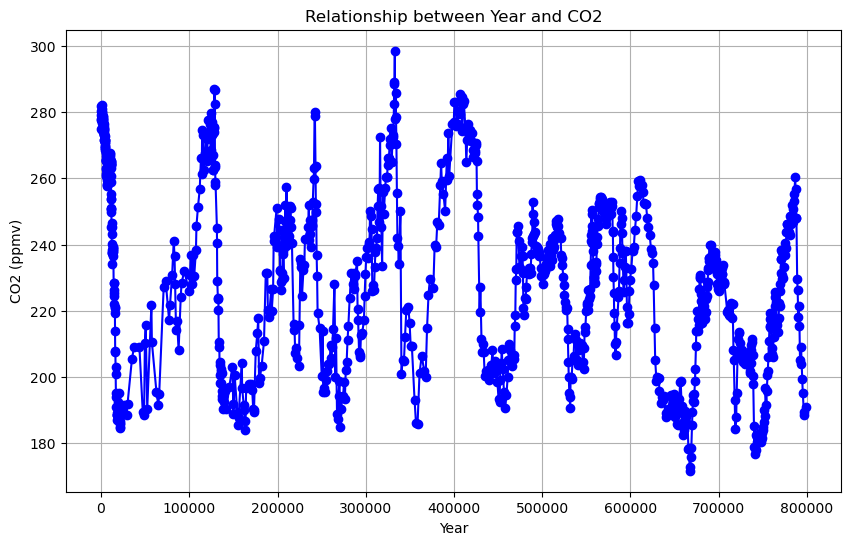

In [50]:
# Reanme column EDC3 as year
co2_composite.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Add plotting
plt.figure(figsize=(10, 6)) # set up size of the figure 
plt.plot(co2_composite['year'], co2_composite['CO2 (ppmv)'], marker='o', color='blue')
# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
# Add title
plt.title('Relationship between Year and CO2')
# Add grid 
plt.grid(True)
plt.show()



### 3. Epica 

In [35]:
# Second file
epica = pd.read_excel(os.path.join(input_folder,filename02))


In [36]:
epica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819 entries, 0 to 5818
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bag           5819 non-null   int64  
 1   ztop          5819 non-null   float64
 2   EDC3béta      5819 non-null   float64
 3   AICC2012      5819 non-null   float64
 4   deutfinal     5804 non-null   float64
 5   temp          5819 non-null   float64
 6   acc-EDC3beta  5819 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 318.4 KB


In [37]:
epica.head()


,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


In [72]:
# Checking for null entries
print(epica.isnull().sum())

bag              0
ztop             0
EDC3béta         0
AICC2012         0
deutfinal       15
temp             0
acc-EDC3beta     0
dtype: int64


The column deutfinal has 15 null entries. 

In [77]:
#Droping the rows with null values
epica = epica.dropna(subset=['deutfinal'])


In [78]:
epica.describe()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
count,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000,5804.000000
mean,2917.347864,1603.991325,192294.109034,193210.741532,-417.742884,213.462371,2.042119
std,1675.861031,921.723567,193454.808454,195708.133701,17.949569,3.124649,0.676897
min,13.000000,6.600000,38.517570,31.060000,-450.100000,207.900000,1.096556
25%,1466.750000,806.162500,48009.952500,46996.300000,-432.300000,210.900000,1.508000
50%,2917.500000,1604.075000,123744.150000,121893.500000,-421.300000,212.900000,1.837000
75%,4368.250000,2401.987500,277651.150000,277784.000025,-403.200000,216.000000,2.509084
max,5819.000000,3199.900000,820093.900000,821838.000000,-361.200000,223.100000,4.641000


In [38]:
# 2 sheets from third file
sup_all_records=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='all records',skiprows=6)
co02_composite02=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='CO2 Composite',skiprows=14)

#### Co02 composit 

In [39]:
co02_composite02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB


In [40]:
co02_composite02.head()

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


In [79]:
# Checking for null entries
print(co02_composite02.isnull().sum())

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64


Data does not have missing values in these particular columns.

In [87]:
# Checking column names
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head()) 
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head())

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gasage (yr BP)         1901 non-null   float64
 1   CO2 (ppmv)             1901 non-null   float64
 2   sigma mean CO2 (ppmv)  1901 non-null   float64
dtypes: float64(3)
memory usage: 44.7 KB
   Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0       -51.030000  368.022488               0.060442
1       -48.000000  361.780737               0.370000
2       -46.279272  359.647793               0.098000
3       -44.405642  357.106740               0.159923
4       -43.080000  353.946685               0.043007
Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 3 columns):

### Review data !!

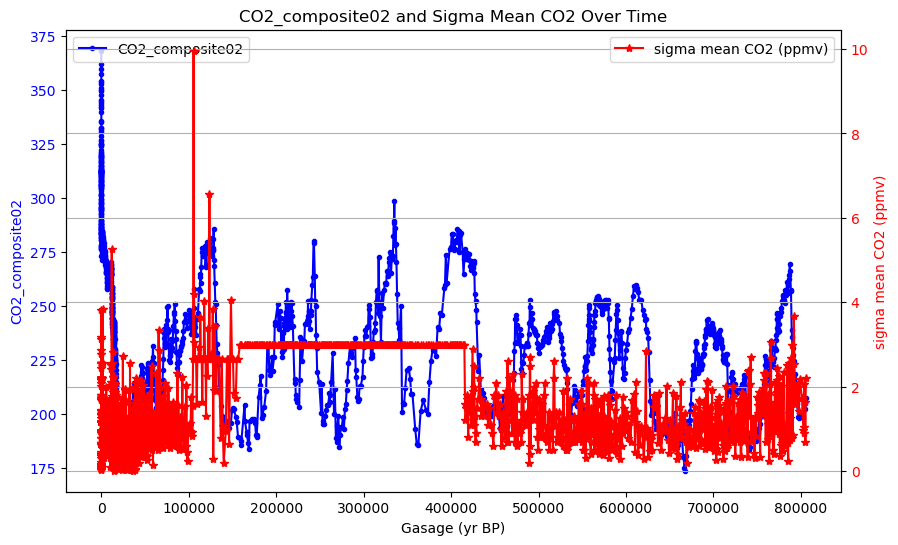

In [92]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Creating plot 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')
ax1.set_xlabel('Gasage (yr BP)')
ax1.set_ylabel('CO2_composite02', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['sigma mean CO2 (ppmv)'], label='sigma mean CO2 (ppmv)', marker='*', color='red')
ax2.set_ylabel('sigma mean CO2 (ppmv)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Adding title of plot
plt.title('CO2 and Sigma Mean CO2 Over 800 Yaeras ')
plt.grid(True)
plt.show()


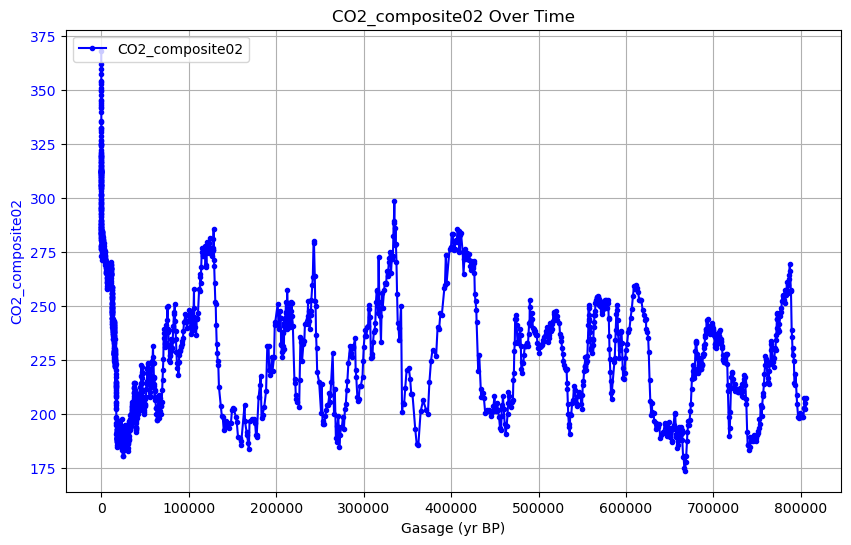

In [95]:

# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CO2 and Gasage on the same axes
ax.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')

# Set labels and legend 
ax.set_xlabel('Gasage (yr BP)')
ax.set_ylabel('CO2_composite02', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.legend(loc='upper left')

# Adding title 
plt.title('CO2_composite02 Over Time')
plt.grid(True)
plt.show()


In [82]:
sup_all_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Columns: 108 entries, Depth (m) to upper bound (2 sigma) of correction F. (ppmv)
dtypes: float64(103), object(5)
memory usage: 330.9+ KB


In [29]:
sup_all_records.head()

,Depth (m),"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv)
0,102.83,137.0,350.110103,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,8893.213,267.902828,3.369565,2950.5275,562654.671212,234.065089,0.938515,0.0,0.0,0.45076
1,106.89,268.0,486.693200,274.9,0.7,173.1,3897.0,3661.9285,272.7,382.42,...,8985.488,265.447325,1.429392,2951.8225,563135.783333,240.114724,2.126252,0.0,0.0,0.49078
2,107.20,279.0,501.195000,277.9,0.7,177.4,4124.0,3746.6270,268.1,382.76,...,9080.986,268.861214,1.418332,2952.9225,563536.650000,242.288114,0.513847,0.0,0.0,0.52478
3,110.25,395.0,539.649455,279.1,1.3,228.6,6735.0,6449.1760,262.2,383.54,...,9176.945,263.952432,1.853741,2954.0225,563928.766667,245.694323,1.769919,0.0,0.0,0.55879
4,110.50,404.0,539.894909,281.9,1.1,250.3,7873.0,7567.3510,254.5,385.33,...,9274.864,270.597511,3.848356,2955.1225,564311.433333,245.812943,0.493195,0.0,0.0,0.59281
